# Case Study 4 : Data Science in Any Data You Like

**Required Readings:** 
* In this case study, you could use any data as you like.
* [TED Talks](https://www.ted.com/talks) for examples of 7 minutes talks.


** NOTE **
* Please don't forget to save the notebook frequently when working in Jupyter Notebook, otherwise the changes you made can be lost.

*----------------------

# Problem: pick a data science problem that you plan to solve using your Data
* The problem should be important and interesting, which has a potential impact in some area.
* The problem should be solvable using the data and data science solutions.

Please briefly describe in the following cell: what problem are you trying to solve? why this problem is important and interesting?

**Roosevelt National Forest** is a beautiful National Forest located in north Colorado. The Natural resource managers there are responsible for developing ecosystem management strategies require basic descriptive information to support their decision-making processes. However, managers generally do not have this type of data for inholdings or neighboring lands that are outside their immediate jurisdiction.   

**Our goal** is using the predictive models to predict the forest cover types in the the Roosevelt National Forest.
It's a multi-classification problem, our target forest cover types has totally 7 distinct tree types.
  
**Our dataset** is from [UCI machine learning Repository](https://archive.ics.uci.edu/ml/datasets/covertype). The dataset has 12 measures, but 54 columns of data(10 quantitative variables, 4 binary wilderness areas and 40 binary soil type variables)


We will apply PCA to do the dimension reduction and use KNN to train the predictive model.

# Data Collection/Processing: 

In [2]:
import pandas as pd
import numpy as np
import sklearn as skl


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

import time
from statistics import mean

from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

In [4]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

# The training and testing data
df = pd.read_csv('train_and_test.csv', index_col=0)

data = df[df.columns[:54]]
labels = df['Cover_Type']

# The validation data
validation_df = pd.read_csv('safe.csv', index_col=0)

validation_data = df[df.columns[:54]]
validation_labels = df['Cover_Type']


# Data Exploration: Exploring the your data

** plot some properties/statistics/distribution of your data** 

#### Histogram of 3 features

<img src="visualization/1.png" width="600">

<img src="visualization/2.png" width="600">

<img src="visualization/3.png" width="500"> | <img 
src="visualization/4.png" width="500">

#### Apply PCA to Decrease the Dimension to 3 to Visualize Target

In [5]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

# Do some PCA
pca = PCA(n_components=3)
transformed_data = pca.fit_transform(data)


<Figure size 720x576 with 0 Axes>

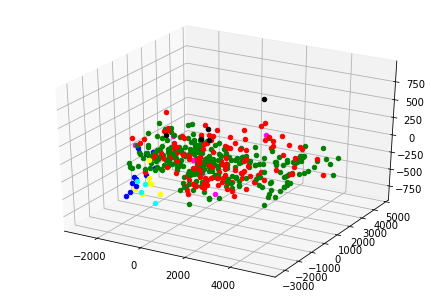

In [6]:
# Plot the results of PCA
plt.figure(figsize=(10,8))
fig = plt.figure()
ax = Axes3D(fig)
ax = fig.gca(projection='3d')

# First 100 entries
x = transformed_data[::450, 0]
y = transformed_data[::450, 1]
z = transformed_data[::450, 2]

# Labels of the first 450 entries
l = np.array(labels)[::450] - 1

# Pick 7 random colors RGBCMYK
colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black']

# Add one at a time so we can pick each point's color
for i in range(450):
    c = colors[l[i]]
    ax.scatter(x[i], y[i], z[i], c=c)
plt.show()


#### Number of Distinct Target

<img src="visualization/6.png" width="500">

# The Solution: implement a data science solution to the problem you are trying to solve.

Briefly describe the idea of your solution to the problem in the following cell:

We will implement a KNN model to predict the cover type that will grow given soil parameters.
K-NN was originally picked due to the irony (similar trees grow near eachother geographically)
but the results show a major improvement over the original paper's model.   

We apply PCA and reserve 10 main components to get the pca dataset. Then we apply knn on both original and pca dataset to compare their time and accuracy.

Write codes to implement the solution in python:

In [7]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

# K Fold cross validation to make sure that we have valid results
kf = KFold(n_splits=5, random_state=None, shuffle=True)

# A list to save the accuracies and times over all folds
accs_nopca = []
times_nopca = []

# Split the data into folds for training and testing
for train_index, test_index in kf.split(data.values):
    
    # Split the data into training and testing
    X_train, X_test = data.values[train_index], data.values[test_index]
    y_train, y_test = labels.values[train_index], labels.values[test_index]
    
    # Declare the classifier and fit it to the data
    knn_nopca = KNeighborsClassifier(n_neighbors=6)
    start = time.clock()
    knn_nopca.fit(X_train, y_train)
    end = time.clock()
    
    # Record the accuracy
    acc = knn_nopca.score(X_test, y_test)
    accs_nopca.append(acc)
    times_nopca.append(end-start)

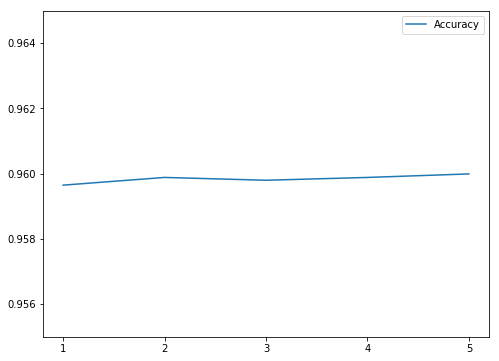

In [54]:
cv_df = pd.DataFrame(accs_nopca)
cv_df.columns = ['Accuracy']
cv_df.index = [1,2,3,4,5]
cv_df.plot(ylim=(0.955,0.965),xticks=[1,2,3,4,5],figsize=(8,6))

In [8]:
# Now let's try this with PCA

# K Fold cross validation to make sure that we have valid results
kf = KFold(n_splits=5, random_state=None, shuffle=True)

# A list to save the accuracies and times over all folds
accs_pca = []
times_pca = []

# Split the data into folds for training and testing
for train_index, test_index in kf.split(data.values):
    
    # Split the data into training and testing
    X_train, X_test = data.values[train_index], data.values[test_index]
    y_train, y_test = labels.values[train_index], labels.values[test_index]
    
    # Declare the PCA model
    pca = PCA(n_components=10)
    
    # Fit and transform the training data
    X_train_trans = pca.fit_transform(X_train)
    # Transform the testing data
    X_test_trans = pca.transform(X_test)
    
    # Declare the classifier and fit it to the data
    knn_pca = KNeighborsClassifier(n_neighbors=6)
    start = time.clock()
    knn_pca.fit(X_train_trans, y_train)
    end = time.clock()

    # Record the accuracy
    acc = knn_pca.score(X_test_trans, y_test)
    accs_pca.append(acc)
    times_pca.append(end-start)
    

## Let's compare the models with the validation data

In [9]:
# First without PCA

knn_nopca = KNeighborsClassifier(n_neighbors=6)
start = time.clock()
knn_nopca.fit(data, labels)
validation_acc_nopca = knn_nopca.score(validation_data, validation_labels)
end = time.clock()

total_time_nopca = end - start

print("Total Running time: " + str(total_time_nopca) + "s")
print("Validation Accuracy: " + str(validation_acc_nopca))


Total Running time: 24.359256000000002s
Validation Accuracy: 0.9799042258616012


In [15]:
pred_labels = knn_nopca.predict(validation_data)

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# Now with PCA
pca = PCA(n_components=10)
data_trans = pca.fit_transform(data)
validation_data_trans = pca.transform(validation_data)

knn_pca = KNeighborsClassifier(n_neighbors=6)
start = time.clock()
knn_pca.fit(data_trans, labels)
validation_acc_pca = knn_pca.score(validation_data_trans, validation_labels)
end = time.clock()

total_time_pca = end - start

print("Total Running time: " + str(total_time_pca) + "s")
print("Validation Accuracy: " + str(validation_acc_pca))


Total Running time: 6.57330300000001s
Validation Accuracy: 0.9798891534926986


# Results: summarize and visualize the results discovered from the analysis

Please use figures, tables, or videos to communicate the results with the audience.


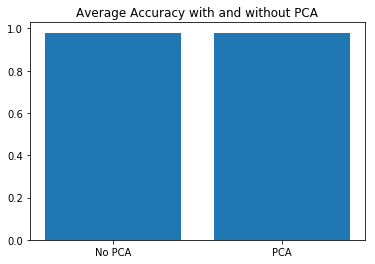

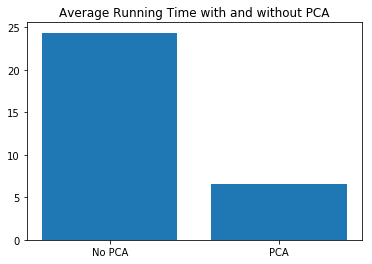

In [11]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

average_acc_nopca = mean(accs_nopca)
average_time_nopca = mean(times_nopca)

average_acc_pca = mean(accs_pca)
average_time_pca = mean(times_pca)

fig, ax = plt.subplots()
plt.bar([1, 2], [validation_acc_nopca, validation_acc_pca])
plt.xticks([1, 2], ('No PCA', 'PCA'))
plt.title("Average Accuracy with and without PCA")
plt.show()

fig2, ax2 = plt.subplots()
plt.bar([1, 2], [total_time_nopca, total_time_pca])
plt.xticks([1, 2], ('No PCA', 'PCA'))
plt.title("Average Running Time with and without PCA")
plt.show()


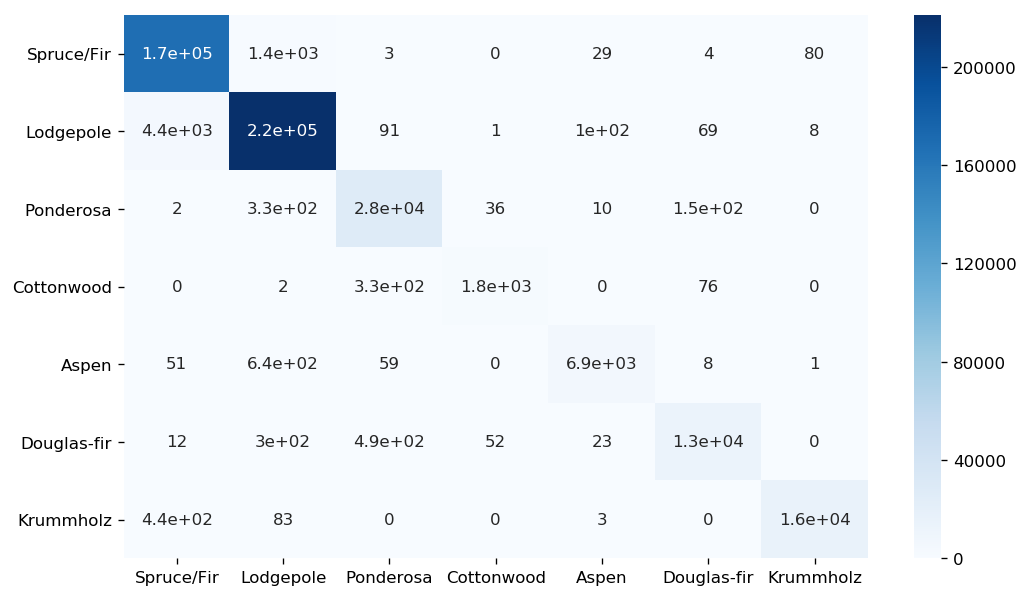

In [42]:
confusion = confusion_matrix(validation_labels,pred_labels)
lis = ['Spruce/Fir','Lodgepole','Ponderosa','Cottonwood','Aspen','Douglas-fir','Krummholz']
confusion_df = pd.DataFrame(confusion,index = lis, columns = lis)
plt.figure(figsize = (10,6),dpi = 120)
sn.heatmap(confusion_df, annot=True, cmap="Blues")
plt.show()

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "jupyter notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.

* **PPT Slides**: please prepare PPT slides (for 7 minutes' talk) to present about the case study . Each team present their case studies in class for 7 minutes.

Please compress all the files in a zipped file.


** How to submit: **

        Please submit through Canvas, in the Assignment "Case Study 4".
        
** Note: Each team only needs to submit one submission in Canvas **